In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

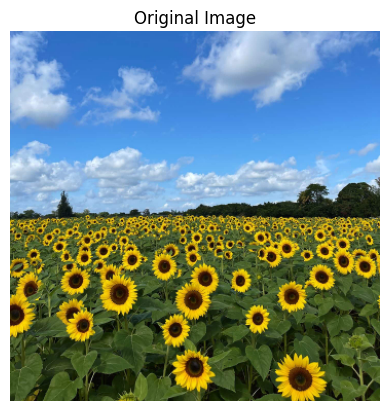

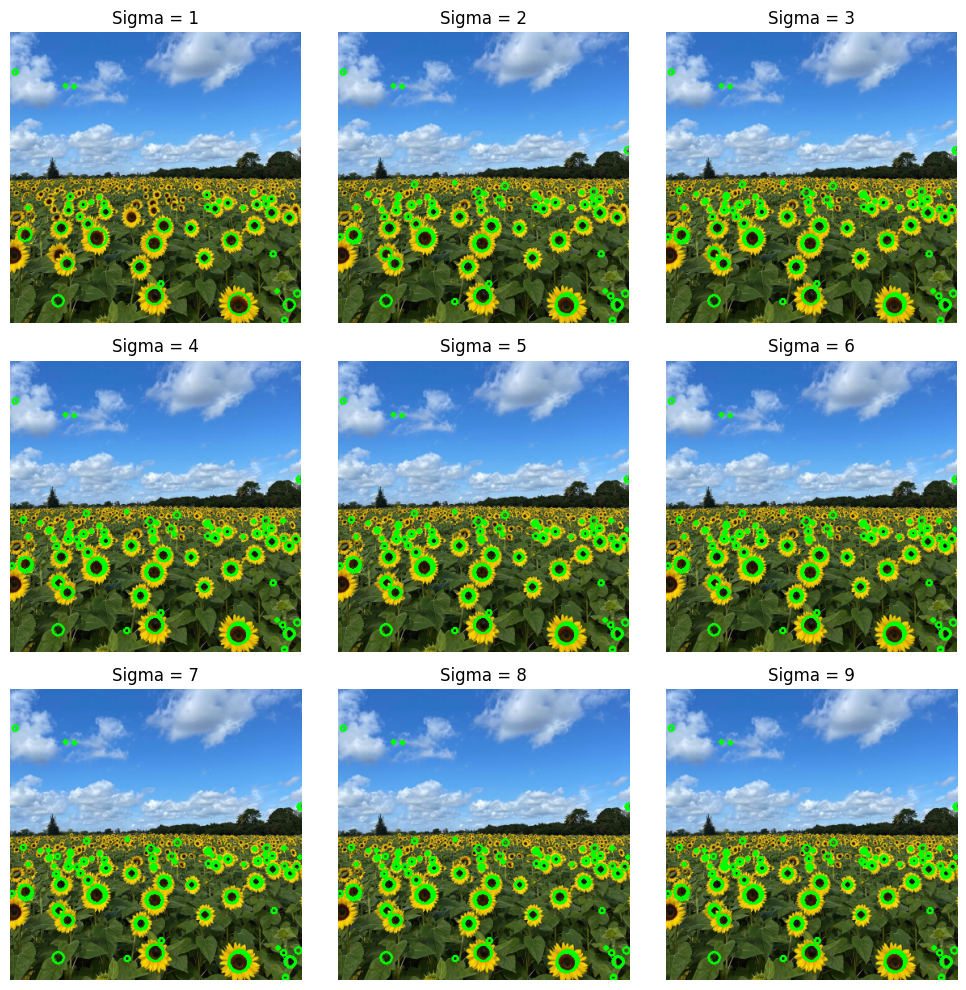

In [6]:
#Question 01
#Test with a range of sigma values

# Load the color image with reduced resolution
image_path = 'Images/the_berry_farms_sunflower_field.jpeg'  # Replace with the actual path to your image
original = cv.imread(image_path, cv.IMREAD_REDUCED_COLOR_4)
image = original.copy()
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Original Image")

# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Sigma values for GaussianBlur
sigma_values = [1,2, 3, 4, 5, 6, 7, 8, 9]  # Sigma values

# Set up the subplot layout
num_rows = 3
num_cols = 3

# Create a new figure
plt.figure(figsize=(10, 10))

for i, sigma in enumerate(sigma_values):
    # Apply GaussianBlur with the current sigma
    blurred_image = cv.GaussianBlur(gray_image, (9, 9), sigma)

    # Apply Laplacian of Gaussians (LoG) for edge detection
    edges = cv.Laplacian(blurred_image, cv.CV_64F)

    # Compute a variable threshold based on the local intensity of LoG responses
    edges_std = np.std(edges)
    min_threshold = 2  # Minimum intensity threshold
    max_threshold = 100 # Maximum intensity threshold

    # Threshold the LoG edges
    _, binary_edges = cv.threshold(edges, min_threshold, max_threshold, cv.THRESH_BINARY)

    # Find contours in the binary edges
    contours, _ = cv.findContours(binary_edges.astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Create a subplot for the current sigma value
    plt.subplot(num_rows, num_cols, i + 1)
    plt.title(f'Sigma = {sigma}')
    
    # Filter and draw circles based on the contours
    for contour in contours:
        area = cv.contourArea(contour)
        if area < 10 or area > 8000:
            continue

        perimeter = cv.arcLength(contour, True)
        circularity = 4 * np.pi * area / (perimeter ** 2)

        # Filter based on circularity
        if circularity > 0.48:
            (x, y), radius = cv.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            cv.circle(image, center, radius, (0, 255, 0), 2)  # Draw circle perimeter with reduced thickness

    # Display the color image with circles
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.axis('off')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()


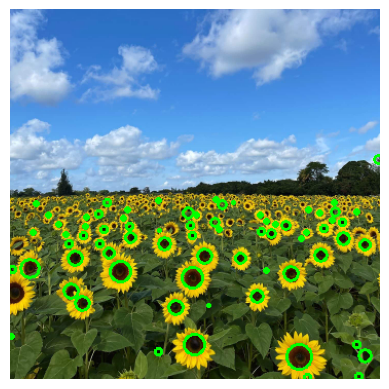

In [8]:
# sigma  = 2

# Load the color image with reduced resolution
image_path = 'Images/the_berry_farms_sunflower_field.jpeg'  # Replace with the actual path to your image
original = cv.imread(image_path, cv.IMREAD_REDUCED_COLOR_4)
image = original.copy()
# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve LoG edge detection
blurred_image = cv.GaussianBlur(gray_image, (9, 9), 2)

# Apply Laplacian of Gaussians (LoG) for edge detection
edges = cv.Laplacian(blurred_image, cv.CV_64F)

# Compute a variable threshold based on local intensity of LoG responses
edges_std = np.std(edges)
min_threshold = 2 #minmum threshold
max_threshold = 100

# Threshold the LoG edges
_, binary_edges = cv.threshold(edges,min_threshold , max_threshold, cv.THRESH_BINARY)


# Find contours in the binary edges
contours, _ = cv.findContours(binary_edges.astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Filter and draw circles based on the contours
for contour in contours:
    area = cv.contourArea(contour)
    if area < 5 or area > 8000:
        continue

    perimeter = cv.arcLength(contour, True)
    circularity = 4 * np.pi * area / (perimeter ** 2)

    # Filter based on circularity
    if circularity > 0.48:
        (x, y), radius = cv.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        cv.circle(image, center, radius, (0, 255, 0), 2)  # Draw circle perimeter with reduced thickness

# Display the color image with circles
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [160]:
pip install scipy


  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/81/d7/d2537d51efb692d0c411e64267ba349e7668d40f5bc73cefe78ccd650dcd/scipy-1.11.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 635.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/44.1 MB 1.7 MB/s eta 0:00:26
   ---------------------------------------- 0.1/44.1 MB 1.2 MB/s eta 0:00:37
   ---------------------------------------- 0.2/44.1 MB 1.2 MB/s eta 0:00:38
   ---------------------------------------- 0.2/44.1 MB 1.2 MB/s eta 0:00:37
   ---------------------------------------- 0.3/44.1 MB 1.3 MB/s eta 0:00:35
   -------------------------------

In [2]:
pip install tikzplotlib

     ---------------------------------------- 0.0/54.2 kB ? eta -:--:--
     --------------- ------------------------ 20.5/54.2 kB ? eta -:--:--
     --------------------- ---------------- 30.7/54.2 kB 435.7 kB/s eta 0:00:01
     --------------------- ---------------- 30.7/54.2 kB 435.7 kB/s eta 0:00:01
     --------------------- ---------------- 30.7/54.2 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 54.2/54.2 kB 233.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install circle_fit

Note: you may need to restart the kernel to use updated packages.


In [57]:
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import tikzplotlib
import numpy as np
import cv2 as cv
import circle_fit as cf
import math


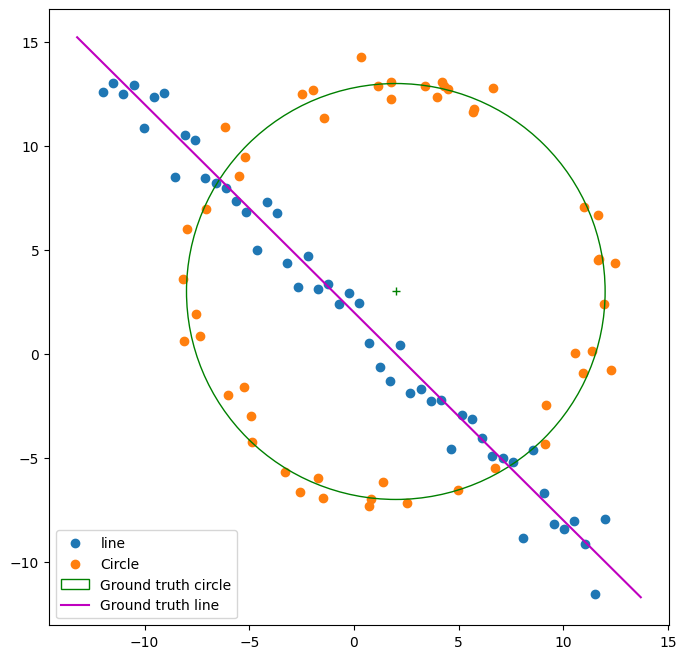

In [12]:
#Generating noisy circular and linear scattered plot and ground truth line and circle plotting

# np . random. seed ( 0 )
N = 100
half_n = N // 2
r = 10
x0_gt , y0_gt = 2 , 3 # Center
s = r /16
t = np.random.uniform(0 , 2*np.pi , half_n )
n = s*np.random.randn ( half_n )
x , y = x0_gt + ( r + n)*np.cos ( t ) , y0_gt + ( r + n)*np.sin ( t )
X_circ = np.hstack ( ( x.reshape ( half_n , 1 ) , y.reshape ( half_n , 1 ) ) )
s = 1.
m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m*x + b + s*np.random.randn ( half_n )
X_line = np.hstack ( ( x.reshape ( half_n , 1 ) , y.reshape ( half_n , 1 ) ) )
X = np.vstack ( ( X_circ , X_line ) ) # Al l point s
fig , ax = plt.subplots (1 ,1 , figsize =(8 ,8) )
ax.scatter( X_line [ : , 0 ] , X_line [ : , 1 ] , label= "line" )
ax.scatter( X_circ [ : , 0 ] , X_circ [ : , 1 ] , label= "Circle" )
Circle_gt = plt.Circle( ( x0_gt , y0_gt ) , r , color= "g" , fill =False , label= "Ground truth circle" )
ax.add_patch ( Circle_gt )
ax.plot ( ( x0_gt ) , ( y0_gt ) , "+" , color= "g" )
x_min , x_max = ax.get_xlim ( )
x_ = np.array ( [ x_min , x_max ] )
y_ = m*x_ + b
plt.plot( x_ , y_ , color= "m" , label= "Ground truth line")
plt.legend()

In [13]:
#form colors

light_purple = (0.97, 0.25, 0.99)
teal = (0, 138/255, 128/255)
lightblue = (0.25,0.8,1)
lightyellow = (1,0.8,0.2)

In [26]:
#Create scattered line and the circle

#np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
x0_gt , y0_gt = 2 , 3
t = np.random.uniform(0 ,2*np.pi ,half_n)
n = s*np.random.randn(half_n)
#x , y = (r + n)*np.cos(t), (r + n)*np.sin(t)
x , y = x0_gt + ( r + n)*np.cos ( t ) , y0_gt + ( r + n)*np.sin ( t )
X_circ = np.hstack((x.reshape(half_n ,1), y.reshape(half_n ,1)))
m, b = -1, 2
x = np.linspace(-12,12 ,half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1),y.reshape(half_n , 1)))
X_comb = np.concatenate((X_circ,X_line), axis = 0 )

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.123663500547205e-10
            Iterations: 8
            Function evaluations: 39
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.140103339558926e-07
            Iterations: 12
            Function evaluations: 55
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.610585628239331e-09
            Iterations: 8
            Function evaluations: 34
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.5620165260928067e-07
            Iterations: 7
            Function evaluations: 31
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5.937900945146503e-08
            Iterations: 6
            Fun

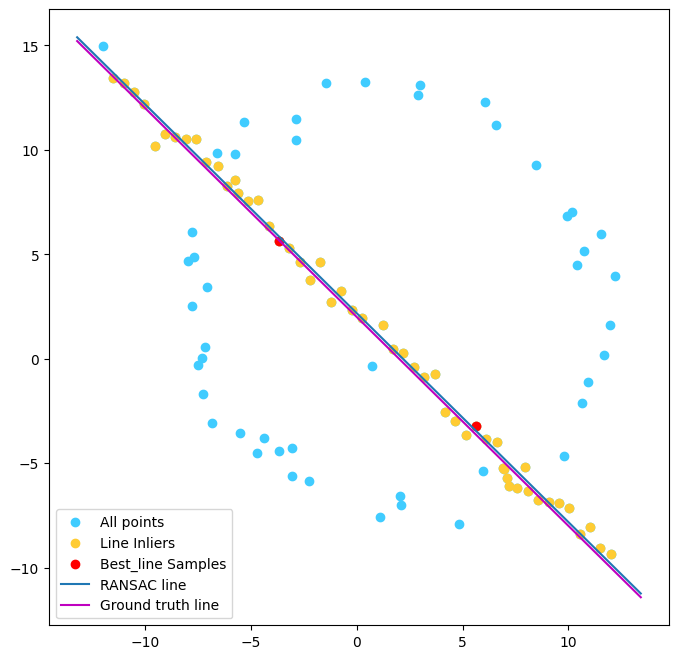

In [27]:
# Item 2: Total least squares line fitting with scicpy.optimize with RANSAC
N = X_comb .shape[0]
X_ = X_comb 

def line_equation_from_points(x1, y1, x2, y2):
    # Calculate the direction vector (Δx, Δy)
    delta_x = x2 - x1
    delta_y = y2 - y1

    # Calculate the normalized vector (a, b)
    magnitude = math.sqrt(delta_x**2 + delta_y**2)
    a = delta_y / magnitude
    b = delta_x / magnitude  #b = -delta_x / magnitude

    # Calculate d
    d = (a * x1) + (b * y1)

    # Return the line equation in the form ax + by = d
    return a, b, d


# RANSAC to fit a line
def line_tls(x, indices):
    a, b, d = x[0], x[1], x[2]
    return np.sum(np.square(a*X_[indices,0] + b*X_[indices,1] - d))

# Constraint
def g(x):
    return x[0]**2 + x[1]**2 - 1

cons = ({'type': 'eq', 'fun': g})

# Computing the consensus (inliers)
def consensus_line(X, x, t):
    a, b, d = x[0], x[1], x[2]
    error = np.absolute(a*X_[:,0] + b*X_[:,1] - d)
    return error < t

t = 1.   # Threshold value to determine data points that are fit well by model.
d = 0.5*N   # Number of close data points required to assert that a model fits well to data.
s = 2       # Minimum number of data points required to estimate model parameters.

inliers_line = []        # Indinces of the inliers
max_iterations = 50
iteration = 0
best_model_line = []     # Best model normal (a, b) and distance from origin d
best_error = np.inf
best_sample_line = []    # Three-point sample leading to the best model computation
res_only_with_sample = [] # Result (a, b, d) only using the best sample
best_inliers_line = []   # Inliers of the model computed form the best sample

while iteration < max_iterations:   
    indices = np.random.randint(0, N, s) # A sample of three (s) points selected at random
    x0 = np.array([1, 1, 0]) # Initial estimate
    res = minimize(fun = line_tls, args = indices, x0 = x0, tol= 1e-6, constraints=cons, options={'disp': True})
    inliers_line = consensus_line(X_, res.x, t) # Computing the inliers
    if inliers_line.sum() > d:
        x0 = res.x
        # Computing the new model using the inliers
        res = minimize(fun = line_tls, args = inliers_line, x0 = x0, tol= 1e-6, constraints=cons, options={'disp': True})
       
        if res.fun < best_error:
            #print('A better model found ... ', res.x, res.fun)
            best_model_line = res.x
            best_eror = res.fun
            best_sample_line = X_[indices,:]
            res_only_with_sample = x0
            best_inliers_line = inliers_line

    iteration += 1

fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.scatter(X_comb[:,0], X_comb[:,1], color=lightblue, label = "All points")
ax.scatter(X_[best_inliers_line,0],X_[best_inliers_line,1], color=lightyellow, label='Line Inliers')
ax.scatter(best_sample_line[:,0],best_sample_line[:,1], color='r', label='Best_line Samples')

x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_model_line[1]*x_ + best_model_line[2])/best_model_line[1]
plt.plot(x_, y_,  label='RANSAC line')
x_ = np.array([x_min, x_max])
y_ = m*x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')
plt.legend()

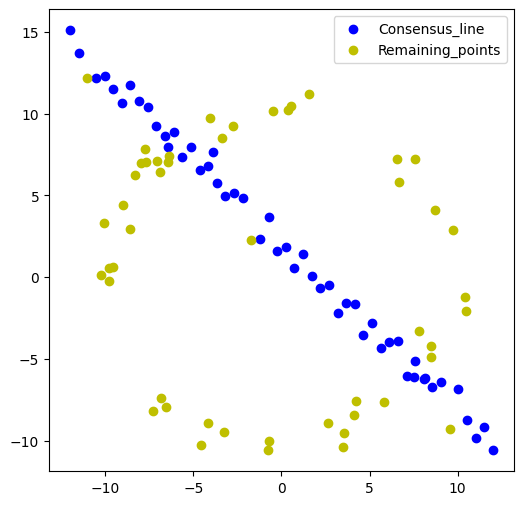

In [22]:
# Finding the best fitting circle

# Create a 1D boolean array
circ_inliers = np.ones(X_comb.shape[0], dtype=bool)

# Remove consensus of best fitting line
circ_inliers[best_inliers_line] = False

fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.scatter(X_[best_inliers_line,0],X_[best_inliers_line,1], color='b', label='Consensus_line')
ax.scatter(X_[circ_inliers,0],X_[circ_inliers,1], color='y', label='Remaining_points')
plt.legend()

Mean radial error: 0.7717959360880481


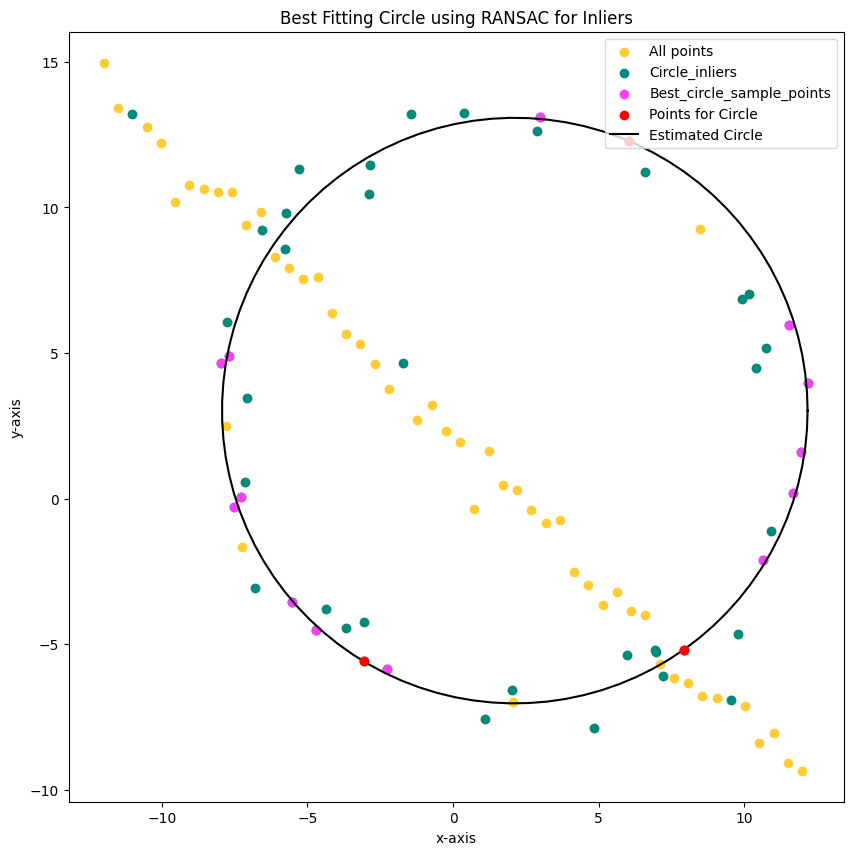

In [28]:

circle_inlier_points = X_comb[circ_inliers]  # Select the data points based on circ_inliers


def fit_circle(data):
    # Fit a circle to the data using least squares
    X, Y = data[:, 0], data[:, 1]
    A = np.column_stack((2*X, 2*Y, np.ones(data.shape[0])))
    b = X**2 + Y**2
    center_and_radius = np.linalg.lstsq(A, b, rcond=None)[0]
    return center_and_radius

def calculate_error(center, radius, data):
    # Calculate radial errors
    distances = np.sqrt((data[:, 0] - center[0])**2 + (data[:, 1] - center[1])**2)
    errors = np.abs(distances - radius)
    return errors

def ransac_circle_fit(data, max_iterations, threshold):
    best_circle = None
    best_inliers = None
    max_inliers = 0

    for _ in range(max_iterations):
        # Randomly select 3 inlier points to form a circle
        indices = np.random.choice(data.shape[0], 3, replace=False)
        circle_params = fit_circle(data[indices])
        center = circle_params[:2]
        radius = np.sqrt(circle_params[2] + np.dot(center, center))
        
        # Calculate errors and find inliers
        errors = calculate_error(center, radius, data)
        inliers = errors < threshold

        # Update the best circle if we have more inliers
        if np.sum(inliers) > max_inliers:
            max_inliers = np.sum(inliers)
            best_circle = (center, radius)
            best_inliers = inliers
            best_circle_indices = indices
            
    return best_circle, best_inliers, best_circle_indices

# Set RANSAC parameters
max_iterations = 1000
threshold = 0.2

# Run RANSAC to fit the circle
#best_circle, best_inliers = ransac_circle_fit(circle_inlier_points, max_iterations, threshold)
best_circle, best_inliers, best_circle_indices = ransac_circle_fit(circle_inlier_points, max_iterations, threshold)
# Calculate radial errors
radial_errors = calculate_error(best_circle[0], best_circle[1], circle_inlier_points)

# Print the mean error
mean_error = np.mean(radial_errors)
print("Mean radial error:", mean_error)

# Create a circle using the estimated parameters
theta = np.linspace(0, 2 * np.pi, 100)
circle_x = best_circle[0][0] + best_circle[1] * np.cos(theta)
circle_y = best_circle[0][1] + best_circle[1] * np.sin(theta)

#Extract the final three points used to estimate the circle
circle_points = circle_inlier_points[best_circle_indices]

# Plot the data points, the circle, and the points used for the circle

fig,ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(X_comb[:, 0], X_comb[:, 1], color=lightyellow, label='All points')
ax.scatter(circle_inlier_points[:, 0], circle_inlier_points[:, 1], color=teal, label='Circle_inliers')
ax.scatter(circle_inlier_points[best_inliers][:, 0], circle_inlier_points[best_inliers][:, 1], color=light_purple, label='Best_circle_sample_points')
ax.scatter(circle_points[:, 0], circle_points[:, 1], color='r', label='Points for Circle',zorder = 5)
ax.plot(circle_x, circle_y, label='Estimated Circle', color='black')

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc="upper right")
plt.title('Best Fitting Circle using RANSAC for Inliers')

# Set equal aspect ratio to make the circle look circular
plt.axis('equal')

plt.show()


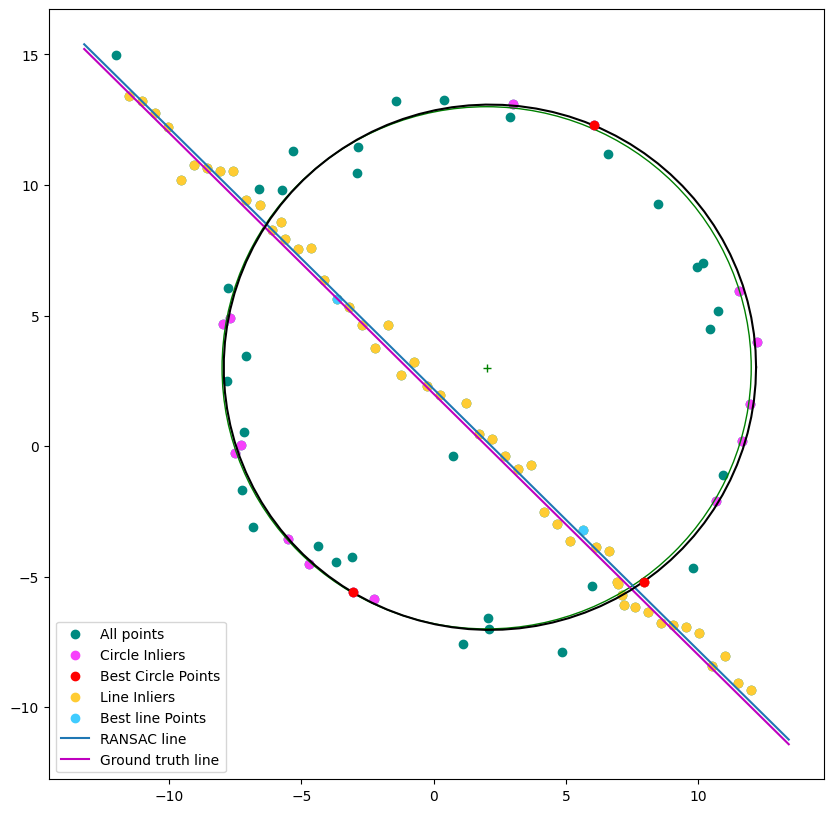

In [30]:
fig,ax = plt.subplots(1,1, figsize=(10,10))

ax.scatter(X_comb[:, 0], X_comb[:, 1], color=teal, label='All points')

ax.scatter(circle_inlier_points[best_inliers][:, 0], circle_inlier_points[best_inliers][:, 1], color=light_purple, label='Circle Inliers')
ax.scatter(circle_points[:, 0], circle_points[:, 1], color='r', label='Best Circle Points',zorder = 5)

ax.scatter(X_[best_inliers_line,0],X_[best_inliers_line,1], color=lightyellow, label='Line Inliers')
ax.scatter(best_sample_line[:,0],best_sample_line[:,1], color=lightblue, label='Best line Points')

#ransac line
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_model_line[1]*x_ + best_model_line[2])/best_model_line[1]
plt.plot(x_, y_,  label='RANSAC line')

#ground truth line
m, b = -1, 2
y_ = m*x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')
plt.legend()


#ransac circle
ax.plot(circle_x, circle_y, label='RANSAC Circle', color='black')

#Plot ground truth circle
r=10
x0_gt , y0_gt = 2 , 3 # Center
Circle_gt = plt.Circle( ( x0_gt , y0_gt ) , r , color= "g" , fill =False , label= "Ground truth circle" )
ax.add_patch ( Circle_gt )
ax.plot ( ( x0_gt ) , ( y0_gt ) , "+" , color= "g" )





In [10]:
##Question 03

def get_user_coordinates(image):
    # Function to get user-selected coordinates
    coordinates = []  # Initialize coordinates list

    def click_event(event, x, y, flags, param):
        if event == cv.EVENT_LBUTTONDOWN:
            coordinates.append((x, y))
            cv.circle(image, (x, y), 5, (0, 0, 255), -1)
            cv.imshow('Image', image)

    cv.imshow('Image', image)
    cv.setMouseCallback('Image', click_event)

    while len(coordinates) < 4:
        cv.waitKey(1)

    return np.array(coordinates, dtype=np.float32)


def superimpose_images(image_bg, image_fg, points_bg, points_fg, alpha, beta):
    # Compute the homography matrix
    homography_matrix, _ = cv.findHomography(points_fg, points_bg)

    # Warp the flag image to fit the architectural image
    image_fg_warped = cv.warpPerspective(image_fg, homography_matrix, (image_bg.shape[1], image_bg.shape[0]))

    # Blend the images
    blended_image = cv.addWeighted(image_bg, alpha, image_fg_warped, beta, 0)

    return blended_image




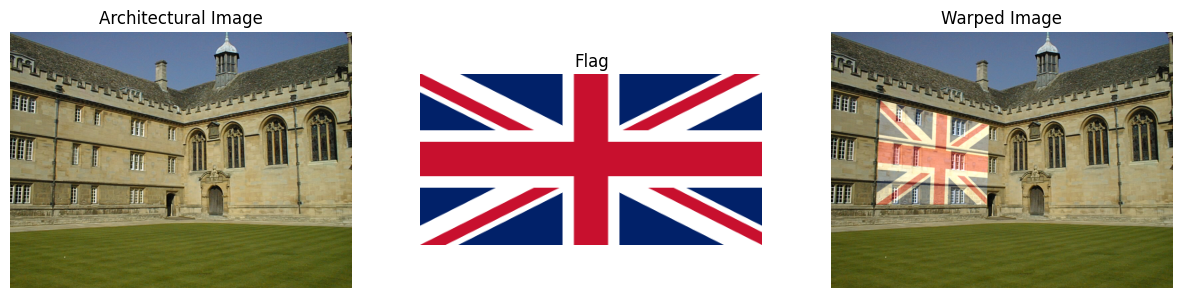

In [4]:
#Example 1
image_bg = cv.imread('Images/Assignment 2 Images/Architectural_set1/001(1).jpg')
image_fg = cv.imread('Images/Assignment 2 Images/Flag_of_the_United_Kingdom_(1-2).svg.png')

# Get user-selected coordinates for both images
points_bg = get_user_coordinates(image_bg.copy())
points_fg = np.array([[0, 0], [image_fg.shape[1], 0], [image_fg.shape[1], image_fg.shape[0]], [0, image_fg.shape[0]]],
                     dtype=np.float32)

# Adjust the values of alpha and beta for blending
alpha = 0.95
beta = 0.4

# Superimpose the images
blended_image = superimpose_images(image_bg, image_fg, points_bg, points_fg, alpha, beta)

# Display the blended image
fig, ax = plt.subplots(1,3,figsize = (15,15))
ax[0].imshow(cv.cvtColor(image_bg, cv.COLOR_BGR2RGB))
ax[0].set_title("Architectural Image")
ax[1].imshow(cv.cvtColor(image_fg, cv.COLOR_BGR2RGB))
ax[1].set_title("Flag")
ax[2].imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
ax[2].set_title("Warped Image")
ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
cv.destroyAllWindows()

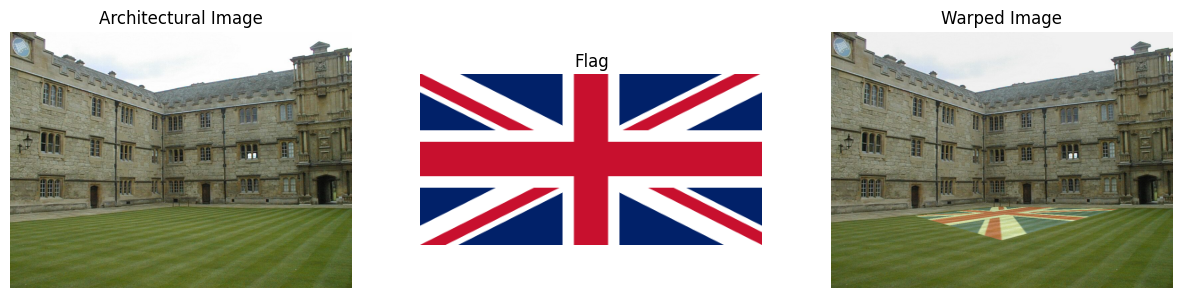

In [10]:
#Example 2
image_bg = cv.imread('Images/Assignment 2 Images/Architectural_set2/003.jpg')
image_fg = cv.imread('Images/Assignment 2 Images/Flag_of_the_United_Kingdom_(1-2).svg.png')

# Get user-selected coordinates for both images
points_bg = get_user_coordinates(image_bg.copy())
points_fg = np.array([[0, 0], [image_fg.shape[1], 0], [image_fg.shape[1], image_fg.shape[0]], [0, image_fg.shape[0]]],
                     dtype=np.float32)

# Adjust the values of alpha and beta for blending
alpha = 0.95
beta = 0.4

# Superimpose the images
blended_image = superimpose_images(image_bg, image_fg, points_bg, points_fg, alpha, beta)

# Display the blended image
fig, ax = plt.subplots(1,3,figsize = (15,15))
ax[0].imshow(cv.cvtColor(image_bg, cv.COLOR_BGR2RGB))
ax[0].set_title("Architectural Image")
ax[1].imshow(cv.cvtColor(image_fg, cv.COLOR_BGR2RGB))
ax[1].set_title("Flag")
ax[2].imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
ax[2].set_title("Warped Image")
ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
cv.destroyAllWindows()

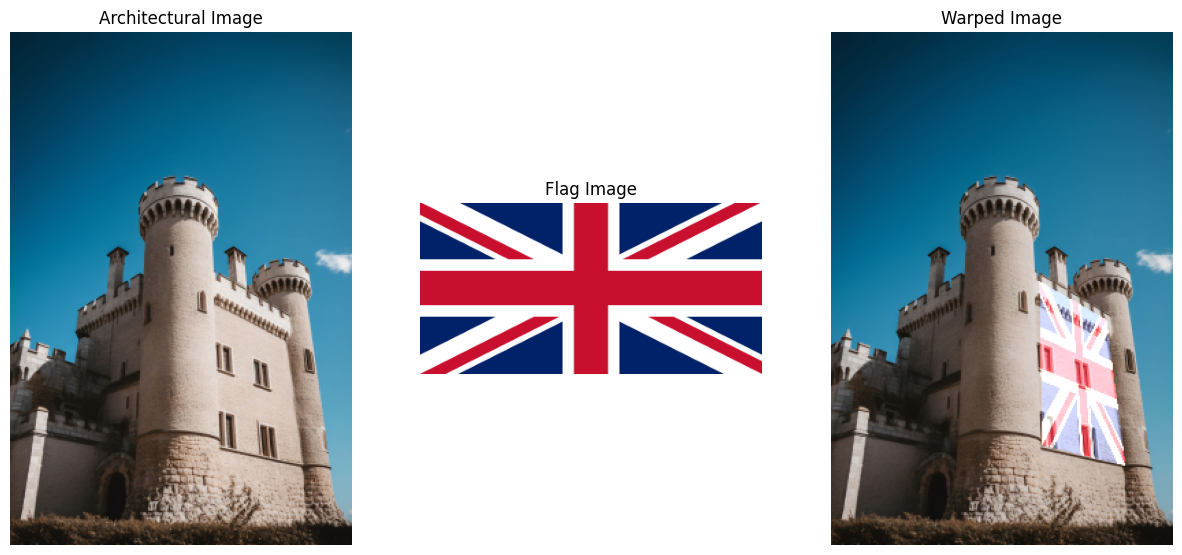

In [11]:
#Example 3
image_bg = cv.imread('Images/Assignment 2 Images/Archi4/castle.jpg', cv.IMREAD_REDUCED_COLOR_4)
image_fg = cv.imread('Images/Assignment 2 Images/Flag_of_the_United_Kingdom_(1-2).svg.png')

# Get user-selected coordinates for both images
points_bg = get_user_coordinates(image_bg.copy())
points_fg = np.array([[0, 0], [image_fg.shape[1], 0], [image_fg.shape[1], image_fg.shape[0]], [0, image_fg.shape[0]]],
                     dtype=np.float32)

# Adjust the values of alpha and beta for blending
alpha = 0.95
beta = 0.7

# Superimpose the images
blended_image = superimpose_images(image_bg, image_fg, points_bg, points_fg, alpha, beta)

# Display the blended image
fig, ax = plt.subplots(1,3,figsize = (15,15))
ax[0].imshow(cv.cvtColor(image_bg, cv.COLOR_BGR2RGB))
ax[0].set_title("Architectural Image")
ax[1].imshow(cv.cvtColor(image_fg, cv.COLOR_BGR2RGB))
ax[1].set_title("Flag Image")
ax[2].imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
ax[2].set_title("Warped Image")
ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
cv.destroyAllWindows()

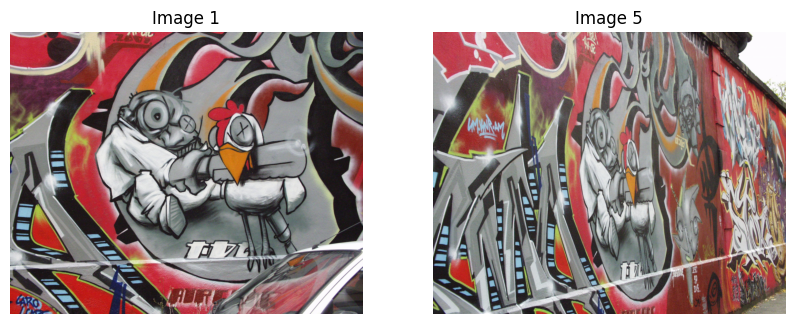

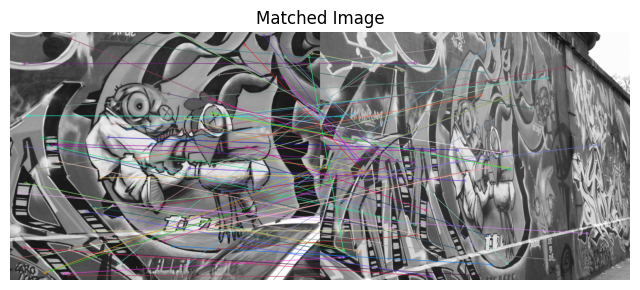

In [153]:
#Question 04

#Part (a)

# Load the images
image_5 = cv.imread('Images/Assignment 2 Images/Q4Images/img5.ppm')
image_1 = cv.imread('Images/Assignment 2 Images/Q4Images/img1.ppm')

# Convert images to grayscale
gray5 = cv.cvtColor(image_5, cv.COLOR_BGR2GRAY)
gray1 = cv.cvtColor(image_1, cv.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv.SIFT_create()

# Finding the keypoints and descriptors
keys_1, descriptors1 = sift.detectAndCompute(gray1, None)
keys_5, descriptors5 = sift.detectAndCompute(gray5, None)

# BFMatcher with default params
bfMatcher = cv.BFMatcher()

# Match descriptors
matches = bfMatcher.knnMatch(descriptors1, descriptors5, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw the matches
matched_image = cv.drawMatches(gray1, keys_1, gray5, keys_5, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#Display original and matched images
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(cv.cvtColor(image_1, cv.COLOR_BGR2RGB), cmap='gray')
ax[0].set_title("Image 1")
ax[0].axis("off")
ax[1].imshow(cv.cvtColor(image_5, cv.COLOR_BGR2RGB), cmap='gray')
ax[1].set_title("Image 5")
ax[1].axis("off")

fig2 , ax = plt.subplots(figsize=(8,8))
ax.imshow(matched_image)
ax.set_title("Matched Image")
ax.axis("off")

# Extract matched points
source = np.float32([keys_1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dest = np.float32([keys_5[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)


In [154]:
# Implementing RANSAC to compute homography
def ransac_homography(src_points, dst_points, max_iterations, threshold):
    max_inliers = 0
    best_homography = None

    for i in range(max_iterations):
        # Randomly select 4 points
        indices = np.random.randint(0, len(src_points), 4)
        src_sample = src_points[indices]
        dst_sample = dst_points[indices]

        # Compute the homography for the sampled points
        homography = cv.findHomography(src_sample, dst_sample)[0]

        # Warp all source points using the computed homography
        warped_points = cv.perspectiveTransform(src_points, homography)

        # Count inliers (points that are close enough to the warped destination points)
        inliers = np.sum(np.linalg.norm(warped_points - dst_points, axis=2) < threshold)

        if inliers > max_inliers:
            max_inliers = inliers
            best_homography = homography

    return best_homography



(-0.5, 799.5, 639.5, -0.5)

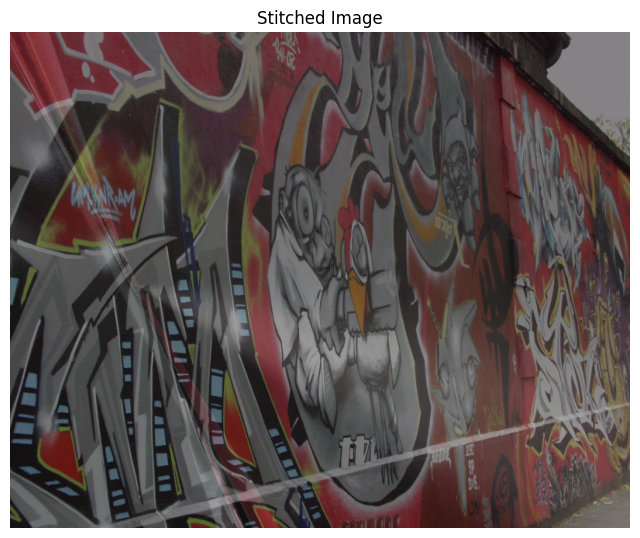

In [155]:
# Compute homography using RANSAC
homography_ransac = ransac_homography(source, dest,5000,80)

# Warp image_1 to image_5 using the computed homography
stitched_image = cv.warpPerspective(image_1, homography_ransac, (image_5.shape[1], image_5.shape[0]))

# Blend the images
alpha = 0.5
beta =  0.2
result = cv.addWeighted(image_5, alpha, stitched_image, beta, 0)

fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB), cmap='gray')
ax.set_title("Stitched Image")
ax.axis("off")